In [9]:
import random
import matplotlib.pyplot as plt

In [7]:
# this function generates a random set of inputs, resembling a potentiostat input for each of the biomarkers
def get_rand():
    return random.uniform(0,1000) # range determined to approximate values actually measured by our potentiostat

In [ ]:
# making dataframes to store all inputs
il1b_resistance_list = []
il6_resistance_list = []
tnfa_resistance_list = []
crp_resistance_list = []
lactoferrin_resistance_list = []

In [12]:
# making dataframes to store all outputs
il1b_sweat_list = []
il6_sweat_list = []
tnfa_sweat_list = []
crp_sweat_list = []
lactoferrin_sweat_list = []

In [ ]:
# this part generates the sweat value for each biomarker given the resistance

for i in range(0, rn):
    
    # EQUATIONS FOR SWEAT FROM RESISTANCE ONCE MODELING DONE

In [5]:
rn = 10 # number of random inputs desired

In [3]:
# making dataframes to store all outputs
il1b_plasma_list = []
il6_plasma_list = []
tnfa_plasma_list = []
crp_plasma_list = []
lactoferrin_plasma_list = []

In [10]:
# this part converts the sweat concentration to plasma concentration 

for i in range(0, rn):
    
    # here we can change the equations to fit for any disease/
    # biomarker we need as long as we have modelled equations
    # each line is formatted as follows:
    # biomarker = a + b * (sweat concentration)
    # more lines can be added for more biomarkers or change the existing ones
    il1b_plasma = -0.859121099839232 + 0.9114676655388801*(float(get_rand())) # CHANGE THIS TO SWEAT CONCENTRATION AS INPUT ONCE WE KNOW THE RANGE OF RESISTANCE VALUES TO SIMULATE
    il6_plasma = 1.5704654392436872 + 0.6839493493025036*(float(get_rand()))
    tnfa_plasma = -0.3610625115091586 + 0.7903607861416451*(float(get_rand()))
    crp_plasma = 1*float(get_rand())
    lactoferrin_plasma = 1*float(get_rand())
    
    # storing values in a list
    il1b_plasma_list.append(il1b_plasma)
    il6_plasma_list.append(il6_plasma)
    tnfa_plasma_list.append(tnfa_plasma)
    crp_plasma_list.append(crp_plasma)
    lactoferrin_plasma_list.append(lactoferrin_plasma)
    #print(il1b_plasma_list,il6_plasma_list, tnfa_plasma_list, crp_plasma_list, lactoferrin_plasma_list)

In [1]:
# making dataframes to store Serum outputs
crp_serum_list = []
lactoferrin_serum_list = []

In [11]:
# this section optional depending on if cutoffs for your disease are reported in plasma or serum

# this part converts the plasma concentration to serum concentration for CRP and Lactoferrin, the two biomarkers for which 
# the diagnostic cutoffs for sepsis are reported in the literature in Sepsis

crp_serum_list = [i*1 for i in crp_plasma_list]
    
lactoferrin_serum_list = [1.41*i for i in lactoferrin_plasma_list]

([], [])

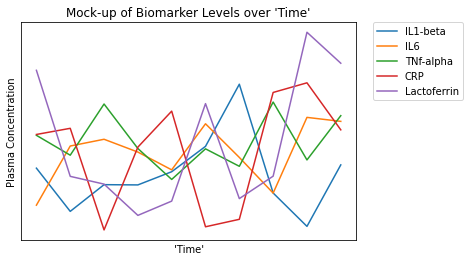

In [12]:
#PLOTTING ALL VARIABLES
plot1 = plt.plot(il1b_plasma_list, label='IL1-beta')
plot2 = plt.plot(il6_plasma_list, label='IL6')
plot3 = plt.plot(tnfa_plasma_list, label='TNf-alpha')
plot4 = plt.plot(crp_serum_list,label='CRP')
plot5 = plt.plot(lactoferrin_serum_list,label='Lactoferrin')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Mock-up of Biomarker Levels over \'Time\'')
plt.ylabel('Plasma Concentration')
plt.xlabel('\'Time\'')
plt.xticks([]) # Source: Evans, N. Hide tick label values but keep axis labels. https://stackoverflow.com/questions/37039685/hide-tick-label-values-but-keep-axis-labels (accessed 2021-10-08).
plt.yticks([])

In [34]:
# Add disease name here
disease_name = "Sepsis"

In [35]:
# a "Sepsis Risk exists" output means that there is a value above the threshold reported in the literature (see wiki 
# writeup for sources) 
for val in il1b_plasma_list:
    if val >= 0.33:
        print(f" {disease_name} risk exists according to IL-1beta")
for val in il_6_list:
    if val >= 16:
        print(f"{disease_name} risk exists according to IL-6")
for val in tnf_a_list:
    if val >= 5:
        print(f"{disease_name} risk exists according to TNF-alpha")
for val in crp_list:
    if val >= 80:
        print(f"{disease_name} risk exists according to CRP")
for val in lactoferrin_list:
    if val >= 675:
        print(f"{disease_name} risk exists according to Lactoferrin")

 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
Sepsis risk exists according to IL-6
Sepsis risk exists according to IL-6
Sepsis risk exists according to IL-6
Sepsis risk exists according to IL-6
Sepsis risk 